## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Datasets/train'
valid_path = 'Datasets/Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\shiva\AppData\Local\Temp/ipykernel_25944/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 13s 8s/step - loss: 6.1103 - accuracy: 0.3438 - val_loss: 6.0690 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 11s 8s/step - loss: 5.2404 - accuracy: 0.3750 - val_loss: 7.6014 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 9s 6s/step - loss: 6.8384 - accuracy: 0.3906 - val_loss: 7.6750 - val_accuracy: 0.3448
Epoch 4/50
2/2 [==============================] - 9s 6s/step - loss: 5.4527 - accuracy: 0.5000 - val_loss: 9.7117 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 9s 6s/step - loss: 5.2697 - accuracy: 0.3750 - val_loss: 1.0573 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 9s 7s/step - loss: 1.1745 - accuracy: 0.6562 - val_loss: 2.6647 - val_accuracy: 0.6034
Epoch 7/50
2/2 [==============================] - 9s 6s/step - loss: 3.6560 - accuracy: 0.4844 - val_loss: 2.6291 - val_accuracy: 0.4828
Epoch 8/50
2/2 [=======================

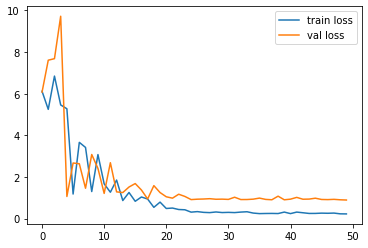

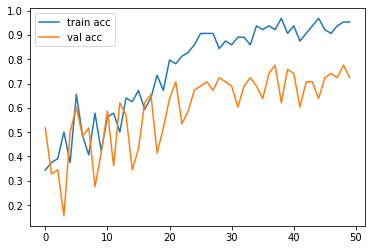

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[2.6670502e-02, 5.7686627e-01, 3.9646322e-01],
       [2.2365189e-01, 4.9315175e-01, 2.8319633e-01],
       [1.1160652e-01, 1.3734810e-01, 7.5104535e-01],
       [5.5678482e-03, 3.8643863e-02, 9.5578831e-01],
       [2.1783777e-02, 6.6731882e-01, 3.1089741e-01],
       [1.6484316e-02, 9.5393169e-01, 2.9584050e-02],
       [7.3263866e-01, 2.6255670e-01, 4.8046010e-03],
       [4.1377633e-03, 9.4764763e-01, 4.8214566e-02],
       [1.6153427e-02, 2.0106602e-01, 7.8278053e-01],
       [9.4415564e-03, 9.2627740e-01, 6.4281031e-02],
       [2.4505524e-02, 8.7082362e-01, 1.0467088e-01],
       [1.5805028e-02, 9.4915271e-01, 3.5042271e-02],
       [8.9825946e-01, 7.0426062e-02, 3.1314548e-02],
       [2.1317029e-01, 4.7808573e-01, 3.0874395e-01],
       [5.4612029e-02, 9.2265004e-01, 2.2737961e-02],
       [4.9602184e-02, 1.2703027e-02, 9.3769479e-01],
       [6.4334730e-03, 9.5678091e-01, 3.6785629e-02],
       [9.6938038e-01, 1.9226277e-02, 1.1393299e-02],
       [4.4566554e-01, 1.302

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1